# 纽约数据 

我们从https://coronavirus.1point3acres.com/en/test 获取了4月1日到四月17日纽约每天的新冠状病毒的阳性和阴性的数量。如下图所示

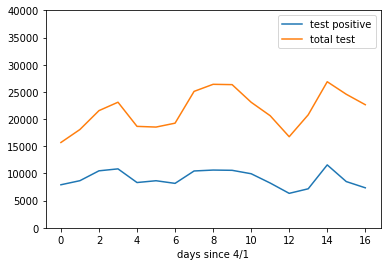

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.optimize as opt

# data token from https://coronavirus.1point3acres.com/en/test
test_data=[
    #[positive., negative]
    [7917,7777], # 4/1
    [8669,9416],
    [10482,11073],
    [10841, 12260], # 4/4
    [8327,10332],
    [8658, 9873],
    [8174,11073],
    [10453,14642],# 4/8
    [10621,15775],
    [10575,15761],
    [9946,13149],
    [8236,12385],
    [6337,10419],
    [7177,13609],
    [11571,15298],
    [8505,16062],
    [7358,15286] # 4/17
]

test_data=np.array(test_data)
#[positive., negative]
test_data[:,1]=test_data[:,1]+test_data[:,0]

time=np.arange(0,test_data.shape[0])

plt.figure()
plt.xlabel("days since 4/1")
plt.ylim([0,40000])

plt.plot(time, test_data[:,0])
plt.plot(time, test_data[:,1])
plt.legend(["test positive","total test"])
plt.show()
print()

# 分析

1. 要看疫情的严重程度不能只看有多少人测试为阳性，还要看有一共测试了多少人。显然，对于相同的疫情严重程度，得到测试的人越多，那么测试为阳性的人也就越多。
2. 测试的人数跟当天是星期几有关，因为测试因为周末要休假！！！？？？
3. 为了研究测试为阳性的数量，我们先鲁莽的假设测试阳性的人数是时间的二次函数。
$N_p = a + b t + c t^2$
其中，$N_p$为测试为阳性的人数，$a$, $b$, $c$为人数。$t$则代表时间，等于当时时刻减去参考时间点，单位为天。
4. 但是我们不能使用上面的公式直接拟合数据，因为我们还没有考虑一共测试的人数带来的影响。所以我们对我们的公式做一下修正。
$N_p = a + b t + c t^2 + d (N_t-25k)$。其中$d$是参数，$N_t$是当天一共测试的人数。让$N_t$先减去25k再乘以$d$纯粹是本人习惯，对最终结果没有任何影响。


In [2]:
#x = [time, total test]


def ana(test_data, day):
    time=np.arange(0,test_data.shape[0])
    def test_positive2(x, a, b, c, k):
        return a + b*x[:,0] + c*x[:,0]*x[:,0] + k*(x[:,1]-25*1000) 


    # test positive
    ydata=test_data[:,0]
    xdata=np.transpose([time,test_data[:,1]])
    par,_=opt.curve_fit(test_positive2, xdata, ydata)

    test_positive_model=test_positive2(xdata, par[0], par[1], par[2], par[3])
    test_positive_model_fixtotaltest=test_positive2(np.transpose([time, 25*1000*np.ones_like(time)]), par[0], par[1], par[2], par[3])

    plt.figure(figsize=(7,5))
    plt.plot(time, test_data[:,0])
    plt.plot(time, test_positive_model)
    plt.plot(time, test_positive_model_fixtotaltest)
    plt.ylim([5000,15000])
    plt.xlabel("days since 4/" + str(17+1-day))
    plt.legend(["test positive","test posiitve (model: a + b*t + c*t^2 + k*[total test - 25k])",
                "test positive assuming 25k total test (model: a + b*t + c*t^2)"])
    plt.show()
    


如下为4月4日到4月17日，这两个星期的分析结果。其中蓝线是实际的测试为阳性的人数。黄线是给定时间和一共测试的人数，我们的模型预测的，测试为阳性的人数。可以看出我们的模型基本上可以工作。绿线则是，假设我们恒定的测量25k人，我们的模型预测的，测试为阳性的人数。我们认为绿线的变化趋势可以反应疫情的变化趋势，因为它一定程度上消除了测试人数带来的影响。
明显我们可以得出结论：纽约的疫情已经趋于好转！

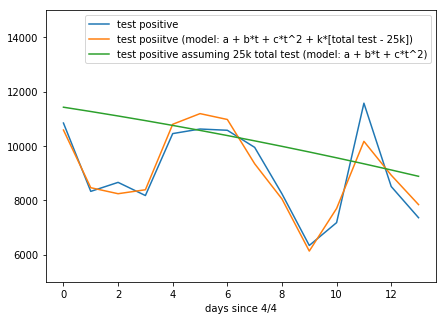

In [3]:
ana(test_data[-14:,:], 14)

如下为4月4日到4月10日，这一个星期的分析结果。

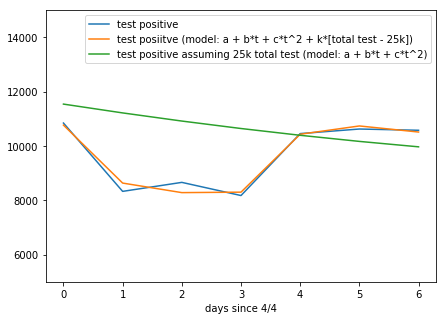

In [4]:
ana(test_data[-14:-7,:], 14)

如下为4月8日到4月14日，这一个星期的分析结果。

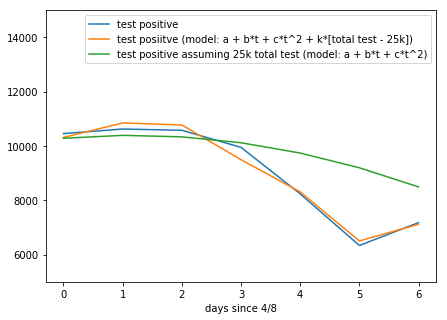

In [5]:
ana(test_data[-10:-3,:], 10)

如下为4月11日到4月17日，这一个星期的分析结果。

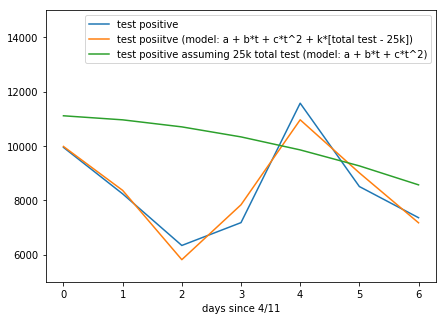

In [6]:
ana(test_data[-7:,:], 7)

一个问题：在周末检测人数少，而在平时检测人数多。如果我们无法完全扣除检测人数带来的影响，比如我们修正不足，那么周末检测人数减少带来的测试为阳性的数量减少，会被误认为是实际的阳性数量减少，会导致我们误以为疫情改善。反之，我们修正过度，会误以为疫情加重。所以我们研究了四个区间：

第一个区间为：4月4日到4月17日，这个区间为两个星期长，所以一个星期内的检测数量导致的影响可以被消除。这个结果反应的是长期的数据。

第二个区间为：4月4日到4月10日，第三个区间为：4月11日到4月17日。这两个区间，后期的检测人数多余前期。

第四个区间为：4月8日到4月14日。周末在这个区间的末尾。这个区间，前期的检测人数多于后期。


但是四个区间，恒定的测量25k人 模型预测的 阳性人数 都呈现下降趋势，所以我们最终结论是：纽约的疫情有所好转！